In [1]:
import numpy as np
from solver import *
from solver import Device

In [12]:
my_device = Device()

theta = 0.761
p_TE = 0
p_TM = 1
R, T = calculateRT(my_device, 1, theta, 0, p_TE, p_TM, 1, 1.45**2, backward=True)

print(f"Reflection: {R} \n Transmission: {T} \n Total: {R+T}")

Reflection: [0.95939465] 
 Transmission: [0.04060535] 
 Total: [1.]


In [80]:
bragg_grating = PeriodicDevice(5)
bragg_grating.addLayer(0.2, 2**2)
bragg_grating.addLayer(0.2, 1)


wls = np.arange(0.5, 0.7, 0.002)
Rs, Ts, RpTs = [], [], []

theta = 0
p_TE = 1
p_TM = 0

for wl in wls:
    R, T = calculateRT(bragg_grating, wl, theta, 0, p_TE, p_TM, 1**2, 2**2)
    Rs.append(R)
    Ts.append(T)
    RpTs.append(R+T)

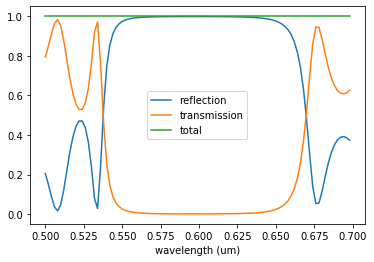

In [81]:
import matplotlib.pyplot as plt

plt.plot(wls, Rs, label='reflection')
plt.plot(wls, Ts, label='transmission')
plt.plot(wls, RpTs, label='total')
plt.legend()
plt.xlabel("wavelength (um)")
plt.show()

In [31]:
ep_glass = 1.45**2
ep_air = 1

In [50]:
wls = np.arange(0.3, 0.9, 0.002)
Rs, Ts, RpTs = [], [], []

L_cavity = 0.3
t_mirror = 0.03
eps_si = 3.5**2

for wl in wls:
    fabry_perot_mirror = Device()
    fabry_perot_mirror.addLayer(t_mirror, au_eps(wl))
    fabry_perot_mirror.addLayer(L_cavity, ep_air)
    fabry_perot_mirror.addLayer(t_mirror, au_eps(wl))
    R, T = calculateRT(fabry_perot_mirror, wl, theta, 0, p_TE, p_TM, 1, 1.45**2)
    Rs.append(R)
    Ts.append(T)
    RpTs.append(R+T)

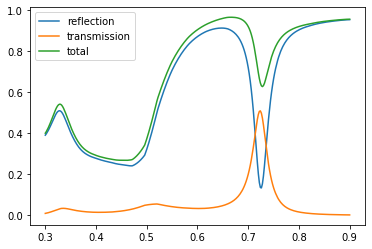

In [51]:
import matplotlib.pyplot as plt

plt.plot(wls, Rs, label='reflection')
plt.plot(wls, Ts, label = "transmission")
plt.plot(wls, RpTs, label = "total")
plt.legend()
plt.show()

In [1]:
import numpy as np
from solver import *
from solver import Device

au_data = np.loadtxt('Johnson_au.csv', delimiter=',', skiprows=1)
au_wvls =au_data[:,0]
au_ns = au_data[:,1]
au_ks = au_data[:,2]
au_eps_data = (au_ns + 1j * au_ks)**2

def au_eps(wvl):
    return np.interp(wvl, au_wvls, np.conjugate(au_eps_data))

In [2]:
wls = np.arange(0.45, 0.8, 0.002)
Rs, Ts, RpTs = [], [], []

L_cavity = 0.155
t_mirror = 0.031
eps_siO = 1.45**2

for wl in wls:
    screen = Device()
    screen.addLayer(t_mirror, au_eps(wl))
    screen.addLayer(L_cavity, eps_siO)
    
    R, T = calculateRT(screen, wl, 0, 0, 1, 0, 1, au_eps(wl))
    Rs.append(R)
    Ts.append(T)
    RpTs.append(R+T)

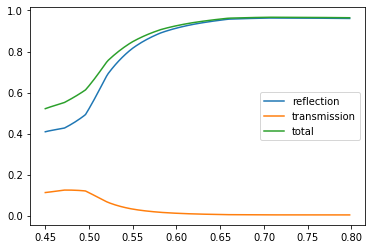

In [4]:
import matplotlib.pyplot as plt

plt.plot(wls, Rs, label='reflection')
plt.plot(wls, Ts, label = "transmission")
plt.plot(wls, RpTs, label = "total")
plt.legend()
plt.show()